In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn import neighbors
from matplotlib import pyplot as plt

In [26]:
iris_data = sns.load_dataset("iris")
iris = pd.DataFrame(iris_data)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
x = iris.drop(columns = "species")

p = preprocessing.LabelEncoder()
y = p.fit_transform(iris["species"])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.2)
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
prediction,y_test

(array([ 1.42820379,  1.24927607, -0.23925303,  1.57549431, -0.03407189,
         1.17313841,  0.01683383,  1.06927859,  1.78107441,  1.15965763,
         0.16059963,  1.95207776,  1.77522323,  1.47270582,  0.17268374,
         0.01445095,  1.48062706,  1.39868757, -0.09526005, -0.04875845,
         1.30739489,  0.02101078, -0.10181988,  1.75128063,  1.75875461,
        -0.02326356,  2.17041641,  0.89476909,  1.60262766,  1.78683838]),
 array([1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 2, 2, 0, 2, 1, 2, 2]))

In [29]:
model.score(x_test,y_test)

0.9117632255509102

In [30]:
mse = metrics.mean_squared_error(y_test,prediction)
mse

0.06166770125386387

In [31]:
X = preprocessing.StandardScaler()
X.fit(x_train)
X.mean_,x_train

(array([5.84      , 3.05583333, 3.77      , 1.21166667]),
      sepal_length  sepal_width  petal_length  petal_width
 128           6.4          2.8           5.6          2.1
 122           7.7          2.8           6.7          2.0
 113           5.7          2.5           5.0          2.0
 70            5.9          3.2           4.8          1.8
 56            6.3          3.3           4.7          1.6
 ..            ...          ...           ...          ...
 112           6.8          3.0           5.5          2.1
 142           5.8          2.7           5.1          1.9
 22            4.6          3.6           1.0          0.2
 40            5.0          3.5           1.3          0.3
 51            6.4          3.2           4.5          1.5
 
 [120 rows x 4 columns])

# Ploting Graph
sepal_length `vs` sepal_width

Text(0.5, 1.0, 'Iris Features')

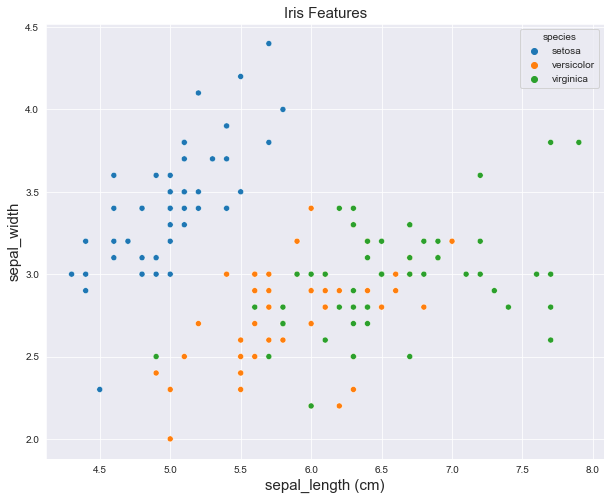

In [32]:
plt.figure(figsize = (10,8))
sns.set_style("darkgrid")
sns.scatterplot(x = "sepal_length", y = "sepal_width", data = iris, hue = "species")
plt.xlabel("sepal_length (cm)", fontsize = 15)
plt.ylabel("sepal_width", fontsize = 15)
plt.title("Iris Features", fontsize = 15)

In [33]:
setosa = iris[iris["species"] == "setosa"].count()
versicolo = iris[iris["species"] == "versicolor"].count()
virginica = iris[iris["species"] == "virginica"].count()

In [34]:
data_setosa = iris[:50]
data_versicolor = iris[50:100]
data_virginica = iris[100:150]

# Setosa `v/s` Versicolor

Text(0.5, 1.0, 'Iris')

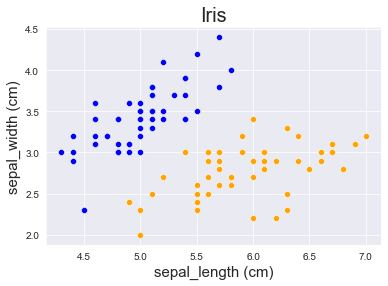

In [35]:
sns.scatterplot(x = data_setosa["sepal_length"], y = data_setosa["sepal_width"], data = data_setosa, color = "blue")
sns.scatterplot(x = data_versicolor["sepal_length"], y = data_versicolor["sepal_width"], data = data_versicolor, color = "orange")
# sns.lineplot(x = y_test, y = prediction)
plt.xlabel("sepal_length (cm)", fontsize = 15)
plt.ylabel("sepal_width (cm)", fontsize = 15)
plt.title("Iris", fontsize = 20)

# KNN (K Nearest Neighbors)

In [36]:
X = iris.drop(columns = ["species"])
Y = iris["species"]

In [37]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.2)
len(X_train),len(X_test)

(120, 30)

In [38]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3) # --> By default it takes n_neighbors = 5
knn.fit(X_train,Y_train)
score = knn.score(X_test,Y_test)
prediction_1 = knn.predict(X_test)

In [39]:
score

1.0

In [40]:
prediction_1

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [41]:
Y_test

40         setosa
92     versicolor
125     virginica
91     versicolor
131     virginica
58     versicolor
60     versicolor
5          setosa
110     virginica
19         setosa
54     versicolor
124     virginica
143     virginica
69     versicolor
147     virginica
109     virginica
122     virginica
142     virginica
66     versicolor
81     versicolor
25         setosa
16         setosa
132     virginica
98     versicolor
148     virginica
1          setosa
75     versicolor
65     versicolor
35         setosa
9          setosa
Name: species, dtype: object

In [42]:
confusion_1 = metrics.confusion_matrix(Y_test,prediction_1)
confusion_1

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 11]], dtype=int64)

Text(88.0, 0.5, 'actual value')

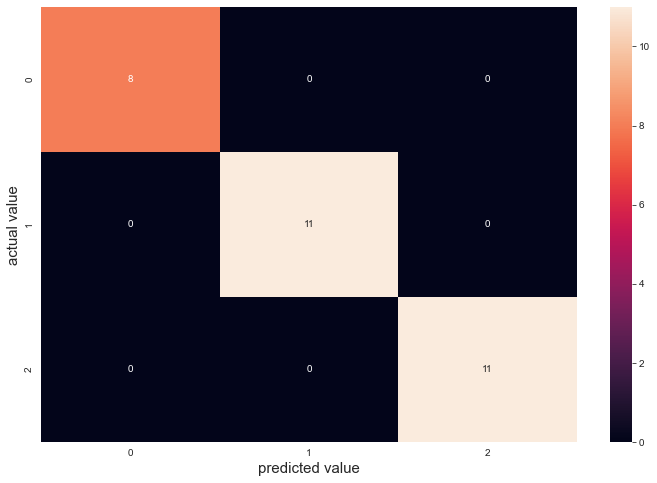

In [43]:
plt.figure(figsize = (12,8))
sns.heatmap(confusion_1, annot = True)
plt.xlabel("predicted value", fontsize = 15)
plt.ylabel("actual value", fontsize = 15)

In [44]:
y_test

array([1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 2, 2, 0, 2, 1, 2, 2])

In [51]:
to_int = np.int64(prediction)
to_int

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 2, 0, 1, 1], dtype=int64)

In [52]:
(y_test == to_int).sum()

20